In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, PoissonRegressor, LinearRegression

from database.db_setup import *

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from models.fit_model import MODEL_FITTING
from models.testing import EVALUATION


Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
ElectrodeUnit()

patient_id patient ID,session_nr session ID,unit_id unique ID for unit (for respective patient),csc number of CSC file,"unit_type unit type: 'M' for Multi Unit, 'S' for Single Unit, 'X': undefined","unit_nr number of unit, as there can be several multi units and single units in one CSC file",brain_region brain region where unit was recorded
12,1,0,4,M,1,LA4
12,1,1,9,S,1,LAH1
12,1,2,9,S,2,LAH1
12,1,3,9,S,3,LAH1
12,1,4,11,M,1,LAH3
12,1,5,11,M,2,LAH3
12,1,6,11,S,1,LAH3
12,1,7,12,S,1,LAH4
12,1,8,13,M,1,LAH5
12,1,9,13,S,1,LAH5


In [3]:
eu_cols = ["patient_id", "unit_id", "csc", "unit_type", "brain_region"]
electrode_unit = pd.DataFrame( data=(ElectrodeUnit& f"patient_id={66}").fetch("patient_id", "unit_id", "csc", "unit_type", "brain_region") ).transpose()
electrode_unit.columns = eu_cols
electrode_unit = electrode_unit.iloc[np.array(electrode_unit.unit_type == "S")]
electrode_unit = electrode_unit.iloc[np.array(electrode_unit.csc != 14)]
electrode_unit.head(40)

,patient_id,unit_id,csc,unit_type,brain_region
8,66,8,5,S,LA5
9,66,9,5,S,LA5
10,66,10,5,S,LA5
12,66,12,6,S,LA6
17,66,17,9,S,LAH1
23,66,23,10,S,LAH2
26,66,26,11,S,LAH3
29,66,29,12,S,LAH4
31,66,31,13,S,LAH5
32,66,32,13,S,LAH5


In [6]:
np.array(list(set(brain_regions)))

array(['LAH', 'LPHC', 'REC', 'LA', 'RMH'], dtype='<U4')

In [5]:
brain_regions = [br[:-1] for br in electrode_unit.brain_region.tolist()]
#brain_regions

In [19]:
np.where(np.array(list(set(brain_regions))) == 'LA')[0]

array([3])

In [8]:
tester = EVALUATION("stats")

In [9]:
b = 1
n_weights = 10
c = (n_weights,1)
splits = [1,2,3,4,5]
#n_weights += 1

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40, 57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(channels)
n_splits = len(splits)
n_units = len(units)

In [15]:
buffer_size = 15
splits = [1,2,3,4,5]
#splits = [1]
bin_size = b
c = (n_weights, 1)
spike_type = "SUA"
spike_combo = "sumExt"
origin = 'zscored'

cscs = "channels_57-80"
#cscs = "channels_5-40"

lfp_path = f'../data_prep/data/{spike_type}/{cscs}/pat66_lfps{spike_type}_df_{origin}_c{c}_b{bin_size}'
spike_path = f'../data_prep/data/{spike_type}/{cscs}/pat66_spikes{spike_type}_df_b{bin_size}_c{c}'


In [11]:
trials = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L1_trial_df["preds"].values.tolist()).flatten(),
        "theta" : np.array(L1_trial_df.theta.values.tolist()).reshape(-1,11).tolist(),
        "channel" : np.array(channels * n_splits),
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L2_trial_df["preds"].values.tolist()).flatten(), 
        "theta" : np.array(L2_trial_df.theta.values.tolist()).reshape(-1,11).tolist(),
        "channel" : np.array(channels * n_splits),
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
0,0.020312,0.020915,"[-5.823059644516378, 0.1512515962583794, -0.05...",5,1,8,0.0,L1
1,0.007911,0.009677,"[-6.913669209715884, 0.231572821666999, -0.061...",5,1,9,0.0,L1
2,0.001621,0.002980,"[-8.803595493565787, 0.10032885713535432, -0.0...",5,1,10,0.0,L1
3,0.002373,0.002496,"[-8.281006076737224, 0.709208042298998, -0.299...",6,1,12,0.0,L1
4,0.001565,0.001754,"[-8.744480044269062, -0.35618397665991947, 0.1...",9,1,17,0.0,L1


In [12]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [17]:
if cscs=="channels_5-40": 
    test_df = exp_df.iloc[np.array(exp_df.channel<45)]
elif cscs=="channels_57-80":
    test_df = exp_df.iloc[np.array(exp_df.channel>45)]
test_df.head()

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
16,0.002626,0.002008,"[-8.21080114006565, -0.09419013554837616, 0.03...",57,1,96,0.0,L1
17,0.000646,0.000896,"[-9.82952964887823, -0.049823964285132215, -0....",57,1,97,0.0,L1
18,0.000074,0.000032,"[-11.703190660217667, -0.15597282963290202, -0...",57,1,98,0.0,L1
19,0.013460,0.014163,"[-6.363058056099437, 0.7311126381320909, -0.11...",58,1,101,0.0,L1
20,0.001736,0.001670,"[-8.669589330226533, -1.030730699709993, 0.077...",58,1,102,0.0,L1


In [14]:
prediction_test_results_40 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 8 - alpha 0.0 - L1 ---
RMSE : 0.05552026189486276

--- Unit 9 - alpha 0.0 - L1 ---
RMSE : 0.03239943808875259

--- Unit 10 - alpha 0.0 - L1 ---
RMSE : 0.010064942963072308

--- Unit 12 - alpha 0.0 - L1 ---
RMSE : 0.014116791054352812

--- Unit 17 - alpha 0.0 - L1 ---
RMSE : 0.013033302889826615

--- Unit 23 - alpha 0.0 - L1 ---
RMSE : 0.004858338353994975

--- Unit 26 - alpha 0.0 - L1 ---
RMSE : 0.01167635582079247

--- Unit 29 - alpha 0.0 - L1 ---
RMSE : 0.02663110999459854

--- Unit 31 - alpha 0.0 - L2 ---
RMSE : 0.03560976488028387

--- Unit 32 - alpha 0.0 - L2 ---
RMSE : 0.03352905023518168

--- Unit 33 - alpha 0.0 - L1 ---
RMSE : 0.016794461882985827

--- Unit 44 - alpha 0.0 - L1 ---
RMSE : 0.041348049294294004

--- Unit 45 - alpha 0.0 - L1 ---
RMSE : 0.0020489904131832134

--- Unit 69 - alpha 0.0004 - L1 ---
RMSE : 0.06336094969600564

--- Unit 70 - alpha 0.0002 - L1 ---
RMSE : 0.03379399879357445

--- Unit 83 - alpha 0.0 - L1 ---
RMSE : 0.13307

In [18]:
prediction_test_results_80 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 96 - alpha 0.0 - L1 ---
RMSE : 0.0168256093221916

--- Unit 97 - alpha 0.0001 - L1 ---
RMSE : 0.008382554344448696

--- Unit 98 - alpha 0.0 - L1 ---
RMSE : 8.64276709379802e-06

--- Unit 101 - alpha 0.0001 - L1 ---
RMSE : 0.0423689168153989

--- Unit 102 - alpha 0.0 - L1 ---
RMSE : 0.014977201275875093

--- Unit 103 - alpha 0.0 - L1 ---
RMSE : 0.003693188340405452

--- Unit 107 - alpha 0.0 - L1 ---
RMSE : 0.02553227843951894

--- Unit 112 - alpha 0.0001 - L1 ---
RMSE : 0.011124826236469126

--- Unit 116 - alpha 0.0001 - L1 ---
RMSE : 0.020383587719553307

--- Unit 117 - alpha 0.0 - L1 ---
RMSE : 0.010846580475163339

--- Unit 118 - alpha 0.0 - L1 ---
RMSE : 0.0020531873206176667

--- Unit 125 - alpha 0.0001 - L1 ---
RMSE : 0.009983475155101031

--- Unit 126 - alpha 0.0 - L1 ---
RMSE : 0.0030721882046996023

--- Unit 129 - alpha 0.0 - L1 ---
RMSE : 0.017374861893671375

--- Unit 142 - alpha 0.0 - L1 ---
RMSE : 0.08441096575801049

--- Unit 143 - alpha 

In [381]:
prediction_test_results_40 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 8 - alpha 0.0 - L1 ---
MAE : 0.006063816954219801

--- Unit 9 - alpha 0.0 - L1 ---
MAE : 0.0020525020005500074

--- Unit 10 - alpha 0.0 - L1 ---
MAE : 0.00027801156462032813

--- Unit 12 - alpha 0.0 - L1 ---
MAE : 0.00045561880064263967

--- Unit 17 - alpha 0.0 - L1 ---
MAE : 0.0003305139138294777

--- Unit 23 - alpha 0.0 - L1 ---
MAE : 9.12929105978844e-05

--- Unit 26 - alpha 0.0 - L1 ---
MAE : 0.00026877188100822726

--- Unit 29 - alpha 0.0 - L1 ---
MAE : 0.001328184718676224

--- Unit 31 - alpha 0.0 - L2 ---
MAE : 0.002448547367888354

--- Unit 32 - alpha 0.0 - L2 ---
MAE : 0.0018857227649386114

--- Unit 33 - alpha 0.0 - L1 ---
MAE : 0.0005339480480462691

--- Unit 44 - alpha 0.0 - L1 ---
MAE : 0.003267791085440133

--- Unit 45 - alpha 0.0 - L1 ---
MAE : 1.2213822293223211e-05

--- Unit 69 - alpha 0.0004 - L1 ---
MAE : 0.008521940053589378

--- Unit 70 - alpha 0.0002 - L1 ---
MAE : 0.0024128262718243958

--- Unit 83 - alpha 0.0 - L1 ---
MAE : 0.0

In [384]:
prediction_test_results_80 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 96 - alpha 0.0 - L1 ---
MAE : 0.0005772546834002844

--- Unit 97 - alpha 0.0001 - L1 ---
MAE : 0.00023217310004962293

--- Unit 98 - alpha 0.0 - L1 ---
MAE : 8.373907713020306e-06

--- Unit 101 - alpha 0.0001 - L1 ---
MAE : 0.0038337654516850637

--- Unit 102 - alpha 0.0 - L1 ---
MAE : 0.00041582861955031554

--- Unit 103 - alpha 0.0 - L1 ---
MAE : 2.0256478266971986e-05

--- Unit 107 - alpha 0.0 - L1 ---
MAE : 0.00022655529643380467

--- Unit 112 - alpha 0.0001 - L1 ---
MAE : 0.0004176385295443765

--- Unit 116 - alpha 0.0001 - L1 ---
MAE : 0.0013598131824393827

--- Unit 117 - alpha 0.0 - L1 ---
MAE : 0.0002743770368682703

--- Unit 118 - alpha 0.0 - L1 ---
MAE : 1.4382348518747642e-05

--- Unit 125 - alpha 0.0001 - L1 ---
MAE : 0.00042721394843230786

--- Unit 126 - alpha 0.0 - L1 ---
MAE : 2.1455672439920793e-05

--- Unit 129 - alpha 0.0 - L1 ---
MAE : 0.0008189976970542365

--- Unit 142 - alpha 0.0 - L1 ---
MAE : 0.011659206671296257

--- Unit 14

In [12]:
prediction_test_results_40 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 8 - alpha 0.0 - L1 ---
MAE : 0.03514014605357298

--- Unit 9 - alpha 0.0 - L1 ---
MAE : 0.011077731952855708

--- Unit 10 - alpha 0.0 - L1 ---
MAE : 0.0009874572470595648

--- Unit 12 - alpha 0.0 - L1 ---
MAE : 0.0024144104899502645

--- Unit 17 - alpha 0.0 - L1 ---
MAE : 0.001787065981160764

--- Unit 23 - alpha 0.0 - L1 ---
MAE : 0.0002829524369138427

--- Unit 26 - alpha 0.0 - L1 ---
MAE : 0.0013107744355353953

--- Unit 29 - alpha 0.0 - L1 ---
MAE : 0.008180329942406426

--- Unit 31 - alpha 0.0 - L2 ---
MAE : 0.013663542559673895

--- Unit 32 - alpha 0.0 - L2 ---
MAE : 0.011221519745248472

--- Unit 33 - alpha 0.0 - L1 ---
MAE : 0.00310585262172531

--- Unit 44 - alpha 0.0 - L1 ---
MAE : 0.01840572290076685

--- Unit 45 - alpha 0.0 - L1 ---
MAE : 4.108247874436087e-05

--- Unit 69 - alpha 0.0004 - L1 ---
MAE : 0.04465175569688667

--- Unit 70 - alpha 0.0002 - L1 ---
MAE : 0.012335209663628558

--- Unit 83 - alpha 0.0 - L1 ---
MAE : 0.0005515278960

In [8]:
prediction_test_results_80 = tester.prediction_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path
)


>>>>>>>>> Start Split 1

--- Unit 96 - alpha 0.0 - L1 ---
MAE : 0.0032143720920985936

--- Unit 97 - alpha 0.0001 - L1 ---
MAE : 0.0009585978834450931

--- Unit 98 - alpha 0.0 - L1 ---
MAE : 8.383812966835033e-06

--- Unit 101 - alpha 0.0001 - L1 ---
MAE : 0.019186581117501635

--- Unit 102 - alpha 0.0 - L1 ---
MAE : 0.002631877919512046

--- Unit 103 - alpha 0.0 - L1 ---
MAE : 0.00017285306519466552

--- Unit 107 - alpha 0.0 - L1 ---
MAE : 0.0007457320117027119

--- Unit 112 - alpha 0.0001 - L1 ---
MAE : 0.0010074544283427303

--- Unit 116 - alpha 0.0001 - L1 ---
MAE : 0.0051896742374554815

--- Unit 117 - alpha 0.0 - L1 ---
MAE : 0.0013534714737975801

--- Unit 118 - alpha 0.0 - L1 ---
MAE : 4.379263884572053e-05

--- Unit 125 - alpha 0.0001 - L1 ---
MAE : 0.0012733784838303175

--- Unit 126 - alpha 0.0 - L1 ---
MAE : 9.503188697541917e-05

--- Unit 129 - alpha 0.0 - L1 ---
MAE : 0.003699106416478901

--- Unit 142 - alpha 0.0 - L1 ---
MAE : 0.06110784448531374

--- Unit 143 - alpha 

In [20]:
prediction_test_results_40[0][0][2].shape[0]/3

317850.0

In [21]:
mae_vals_40 = []
y_test_40 = []
y_pred_40 = []

for x_s in prediction_test_results_40: 
    mae_vals_s = []
    y_test_s = []
    y_pred_s = []
    
    for p, y_t, y_p in x_s: 
        mae_vals_s.append(p)
        y_test_s.append(y_t.flatten())
        y_pred_s.append(y_p.flatten())
            
    mae_vals_s = np.array(mae_vals_s)
    y_test_s = np.array(y_test_s)
    y_pred_s = np.array(y_pred_s)
        
    mae_vals_40.append(mae_vals_s)
    y_test_40.append(y_test_s)
    y_pred_40.append(y_pred_s)
    
y_test_40 = np.array(y_test_40)
y_pred_40 = np.array(y_pred_40)
    
mae_vals_80 = []
y_test_80 = []
y_pred_80 = []
    
for x_s in prediction_test_results_80: 
    mae_vals_s = []
    y_test_s = []
    y_pred_s = []
    
    for p, y_t, y_p in x_s: 
        mae_vals_s.append(p)
        y_test_s.append(y_t.flatten())
        y_pred_s.append(y_p.flatten())
        
    mae_vals_s = np.array(mae_vals_s)
    y_test_s = np.array(y_test_s)
    y_pred_s = np.array(y_pred_s)
        
    mae_vals_80.append(mae_vals_s)
    y_test_80.append(y_test_s)
    y_pred_80.append(y_pred_s)
    
y_test_80 = np.array(y_test_80)
y_pred_80 = np.array(y_pred_80)
    
mae_vals = np.concatenate([
    np.vstack(mae_vals_40),
    np.vstack(mae_vals_80)
], axis=1)
y_test = np.concatenate([
    y_test_40,
    y_test_80
], axis=1)
y_pred = np.concatenate([
    y_pred_40,
    y_pred_80
], axis=1)

In [22]:
sig_units = [8,9,10,12,17,23,26,29,31,32,33,44,69,70,83,96,101,102,103,107,117,118,129,142,143,150,151,152]
len(sig_units)

28

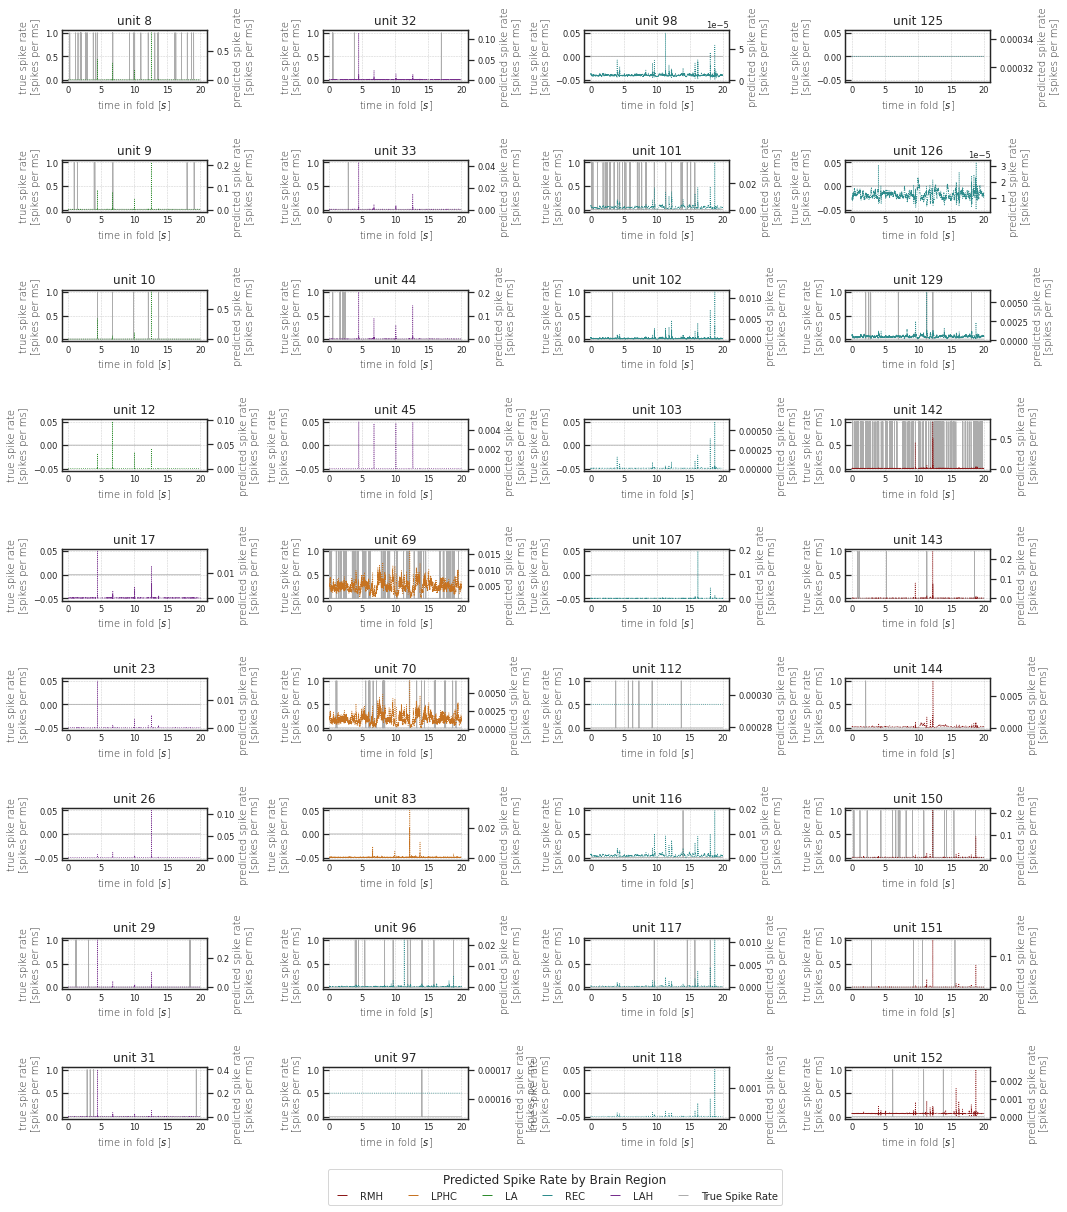

In [36]:
split=0
start=180000
stop=200000
fold_num=0
fold_length=317850
sig_units = units#[8,9,10,12,17,23,26,29,31,32,33,44,69,70,83,96,101,102,103,107,117,118,129,142,143,150,151,152]

fig8, axs = pltr.plot_y_test_preds(
    y_test,
    y_pred,
    units,
    sig_units,
    brain_regions,
    split, 
    start_idx=start,
    stop_idx=stop,
    #fold_length=fold_length, 
    #fold_num=fold_num
)

plt.subplots_adjust(
    left=0.06, right=0.92, bottom=0.12, top=0.96
)

fig8.savefig('plots/plot8.png')
fig8.savefig('plots/plot8.pdf')

In [30]:
import matplotlib
import seaborn as sns
import matplotlib.lines as mlines
class PLOTTER(): 
    
    def __init__(self):
        
        ### define colors ##
        self.blue2    = "#2e518c"
        self.blue3    = "#5079b3"
        self.blue4    = "#7da7d9"
        self.green1   = "#146614"
        self.green2   = "#2e8c2e"
        self.green3   = "#50b350"
        self.green4   = "#7dd97d"
        self.green5   = "#b3ffb3"
        self.red1     = "#660000"
        self.red2     = "#8c1919"
        self.red3     = "#b33e3e"
        self.red4     = "#d97272"
        self.red5     = "#ffb3b3"
        self.magenta1 = "#581466"
        self.magenta2 = "#762e8c"
        self.magenta3 = "#9650b3"
        self.magenta4 = "#b87dd9"
        self.magenta5 = "#dfb3ff"
        self.orange1  = "#b34e0b"
        self.orange2  = "#c67322"
        self.orange3  = "#d99a3d"
        self.orange4  = "#ecc05c"
        self.orange5  = "#ffe480"
        self.cyan1    = "#146666"
        self.cyan2    = "#2e8c8c"
        self.cyan3    = "#50b3b3"
        self.cyan4    = "#7dd9d9"
        self.cyan5    = "#b3ffff"
        self.gray1    = "#4d4d4d"
        self.gray2    = "#6c6c6c"
        self.gray3    = "#8c8c8c"
        self.gray4    = "#acacac"
        self.gray5    = "#cccccc"
        
        palette = "viridis"
        sns.set_palette(palette)
        
        # Plot customizations
        self.tic_font_size = "x-small"
        self.label_font_size = "small"

        self.rc = {
            "figure.figsize":(10.75, 3.75),
            "font.family":"sans serif", 
            "text.usetex":False,
            "xtick.labelsize":self.tic_font_size,
            "ytick.labelsize":self.tic_font_size,
            "axes.axisbelow":True,
            "lines.linewidth":0.8, 
            "legend.fancybox":True, 
            # "text.usetex" : True, 
            # "pdf.fonttype" : 42
        }

        matplotlib.rcParams["lines.linewidth"] = 0.8
        matplotlib.rcParams["legend.fancybox"] = True
        # matplotlib.rcParams["pdf.fonttype"] = 42
        # matplotlib.rcParams["ps.fonttype"] = 42

        # matplotlib.rcParams["text.usetex"] = True

        sns.set(rc=self.rc)
        sns.set_style('white')

        plt.tight_layout()
        
        
    def plot_y_test_preds(
        self, 
        y_test,
        y_pred,
        units,
        significant_units,
        brain_regions,
        split, 
        start_idx=None,
        stop_idx=None,
        fold_length=None, 
        fold_num=None
    ):
        s=split
        
        if start_idx is not None: 
            k=start_idx
            l=stop_idx
        elif fold_length is not None: 
            k=fold_num*fold_length
        
        pred_cols = np.array([self.red2, self.orange2, self.green2, self.cyan2, self.magenta2, self.blue2])
        br_cols = {}
        
        fig, axs = plt.subplots(9,4, figsize=(15,18))
        si=0
        for i in range(len(units)):
            if units[i] in significant_units:
                br = brain_regions[i]
                col_idx = np.where(np.array(list(set(brain_regions))) == br)[0]
                pred_col = pred_cols[col_idx][0]
                br_cols.update({f"{br}":pred_col})
                
                m = si // 9
                n = si % 9
                
                ## fig prep ##
                axs[n,m].grid(linewidth=0.5, linestyle="dashed", zorder=0)
                axs[n,m].tick_params(
                        direction = "in", 
                        bottom = False, top = False,
                        left = True, right = False,
                        zorder = 1
                )
            
                axs[n,m].set_title(f"unit {significant_units[si]}", fontsize="medium")
                axs[n,m].plot(y_test[s][i][k:l], color=self.gray4)
                
                locs = axs[n,m].get_xticks()
                #labels = axs[n,m].get_xticklabels()
                #x_ticks = []
                new_xticks=[f'{int(l/1000)}' for l in locs]
                new_xticks[0] = ""
                new_xticks[-1] = ""
                
                axs[n,m].set_xticks(locs)
                axs[n,m].set_xticklabels(new_xticks)
                
                axs[n,m].get_xticks()
                
                axs[n,m].set_xlabel('time in fold [$s$]', fontweight='light', fontsize=self.label_font_size)
                axs[n,m].set_ylabel('true spike rate\n[spikes per ms]', fontweight='light', fontsize=self.label_font_size)
                
                axsj = axs[n,m].twinx()
                axsj.plot(y_pred[s][i][k:l], color=pred_col, linestyle=":")
                axsj.set_ylabel(
                    'predicted spike rate\n[spikes per ms]', 
                    fontweight='light', fontsize=self.label_font_size, 
                    #rotation=270#, position=(1,1)
                )
                
                si+=1
                      
        ## legend for brain regions ##
        br_handlers = []
        for br in np.array(list(set(brain_regions))):
            br_handlers.append(
                mlines.Line2D([], [], color=br_cols[f"{br}"], marker='_', linestyle='None',
                          markersize=10, label=br)
            )
            
        br_handlers.append(
            mlines.Line2D([], [], color=self.gray4, marker='_', linestyle='None',
                      markersize=10, label="True Spike Rate")
        )
        
        plt.legend(handles=br_handlers, ncol=len(br_handlers), 
                   fontsize=self.label_font_size, 
                   loc="lower center", bbox_to_anchor=(-2,-1.75),
                   title="Predicted Spike Rate by Brain Region", title_fontsize="medium")

        plt.subplots_adjust(hspace=1.5, wspace=0.8)
        
        return fig, axs
        
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

8


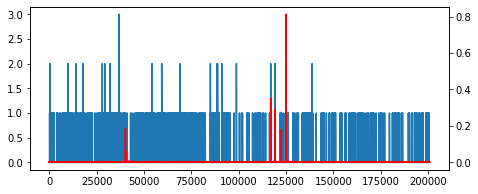

10


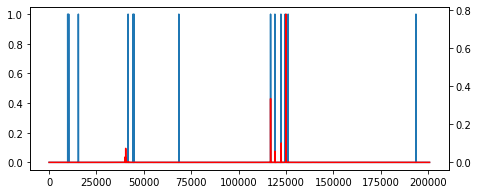

12


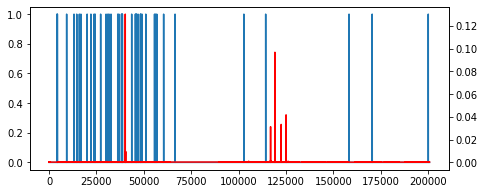

31


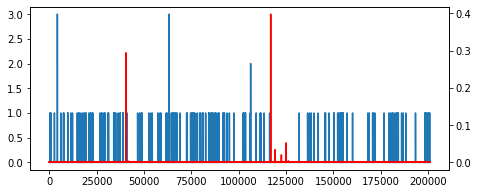

33


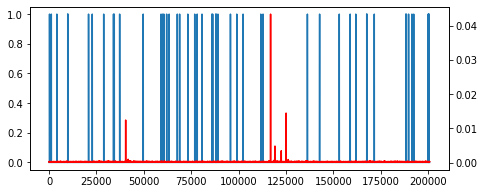

44


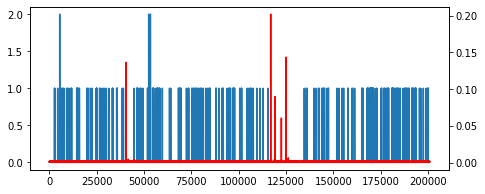

69


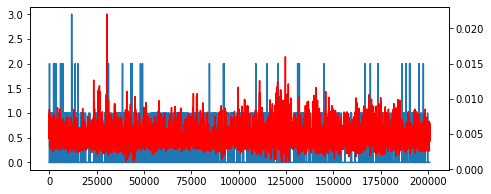

70


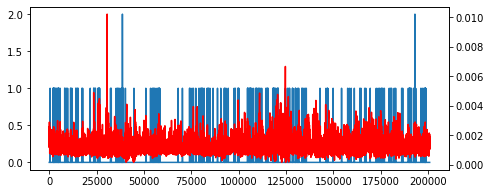

96


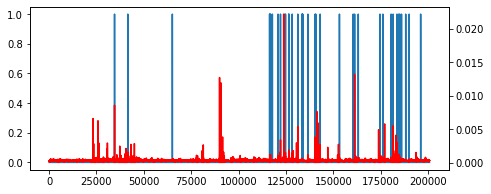

101


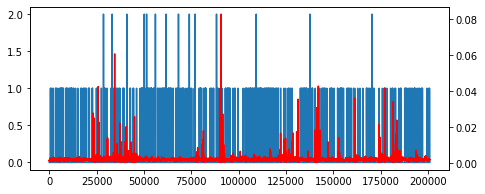

102


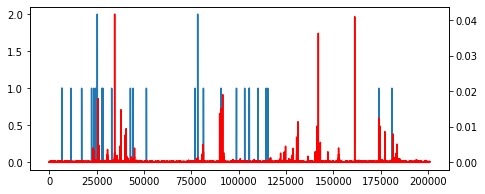

117


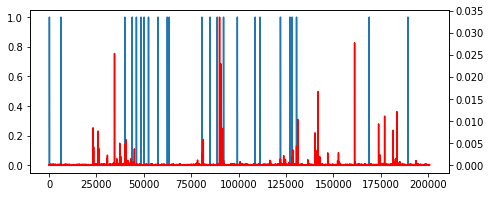

118


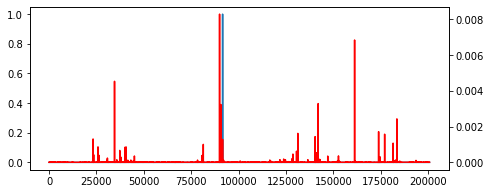

129


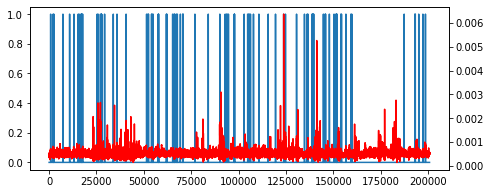

142


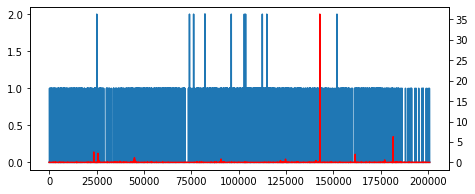

143


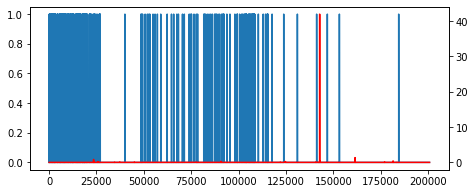

150


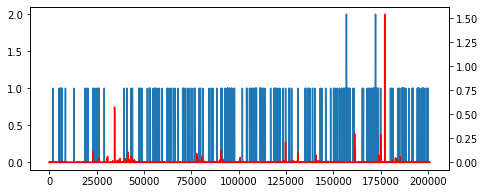

151


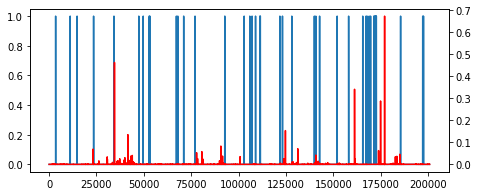

In [162]:
s=0
k=0
l=200772
sig_units = [8,10,12,31,33,44,69,70,96,101,102,117,118,129,142,143,150,151]
for i in range(len(units)):
    if units[i] in sig_units:
        print(units[i])
        fig, axs = plt.subplots(1,1, figsize=(7.5,3))
        axs.plot(y_test[s][i][k:l])
        axsj = axs.twinx()
        axsj.plot(y_pred[s][i][k:l], color="red")
        #plt.plot(plot_pairs[f"{u}"][3][-50000:-30000])
        plt.show()

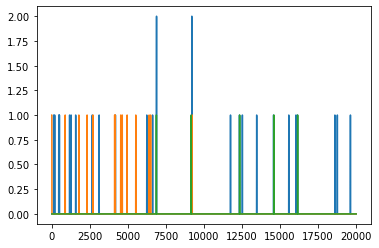

In [112]:
k=110000
l=130000
plt.plot(y_test[0][0][k:l])
plt.plot(y_test[0][1][k:l])
plt.plot(y_test[0][2][k:l])


In [115]:
from sklearn.metrics import mean_absolute_error as MAE

plot_pairs = {}
best_split = mae_vals.argmin(axis=0)
for i in range(len(best_split)): 
    y_t = y_test[best_split[i],1]
    y_p = y_pred[best_split[i],1]
    j = np.array([
        MAE(y_t[0*200772:1*200772], y_p[0*200772:1*200772]), 
        MAE(y_t[1*200772:2*200772], y_p[1*200772:2*200772]), 
        MAE(y_t[2*200772:3*200772], y_p[2*200772:3*200772]), 
    ]).argmin()
    plot_pairs.update({       
        f"{units[i]}" : [
            mae_vals[best_split[i],1],
            MAE(y_t[j*200772:(j+1)*200772], y_p[j*200772:(j+1)*200772]),
            y_t[j*200772:(j+1)*200772],
            y_p[j*200772:(j+1)*200772]
        ]
    })
plot_pairs

{'8': [0.008572366246856856,
  0.00742836814508421,
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0.00123654, 0.00121672, 0.00126624, ..., 0.00111226, 0.00114191,
         0.00119308])],
 '9': [0.008572366246856856,
  0.00742836814508421,
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0.00123654, 0.00121672, 0.00126624, ..., 0.00111226, 0.00114191,
         0.00119308])],
 '10': [0.011077731952855708,
  0.010054000930432037,
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0.00113362, 0.00109873, 0.00111721, ..., 0.00099818, 0.00100693,
         0.00093774])],
 '12': [0.011077731952855708,
  0.010054000930432037,
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0.00113362, 0.00109873, 0.00111721, ..., 0.00099818, 0.00100693,
         0.00093774])],
 '17': [0.008572366246856856,
  0.00742836814508421,
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0.00123654, 0.00121672, 0.00126624, ..., 0.00111226, 0.00114191,
         0.00119308])],
 '23': [0.011077731952855708,
  0.010054000930432037,
  array([0, 0, 0, ...

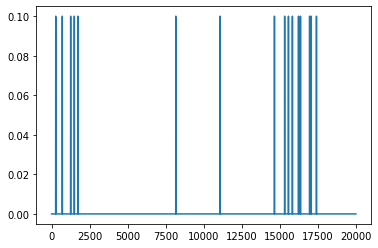

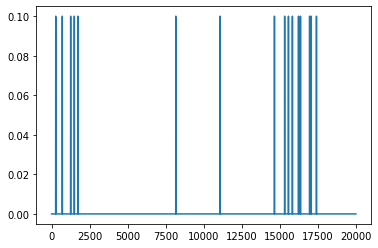

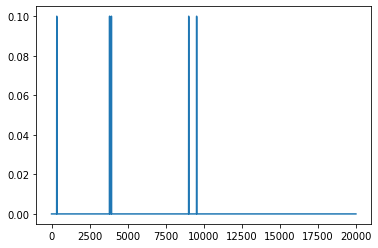

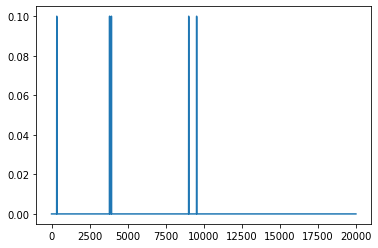

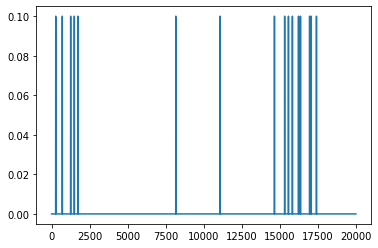

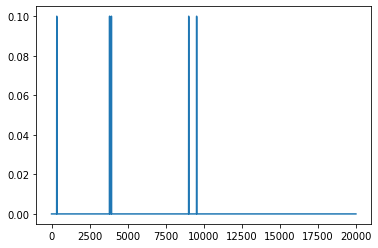

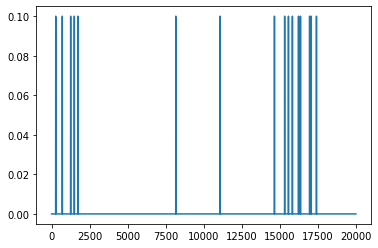

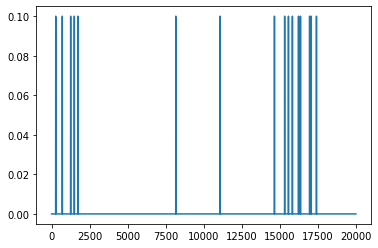

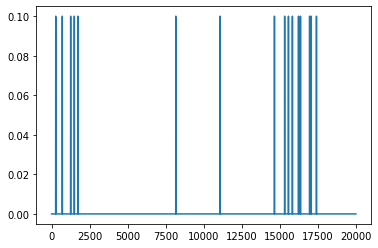

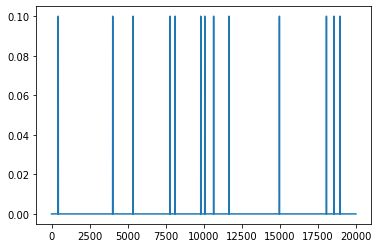

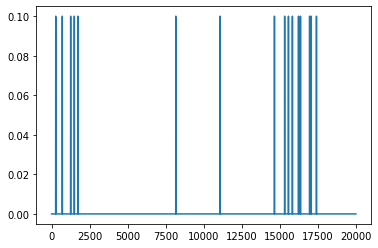

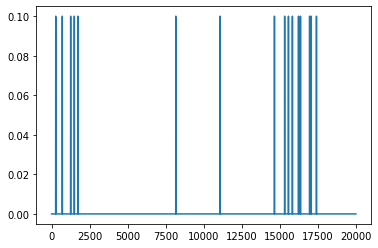

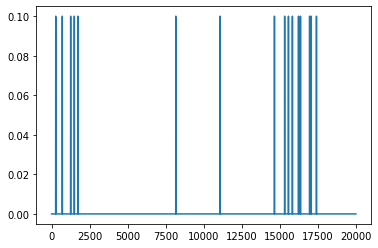

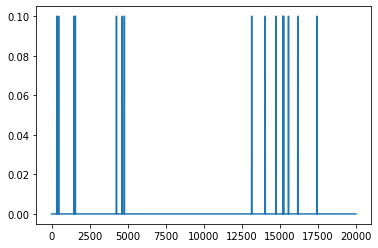

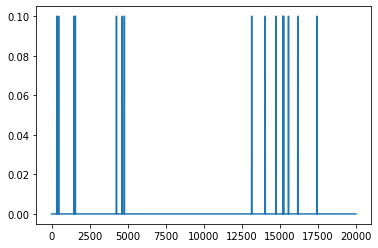

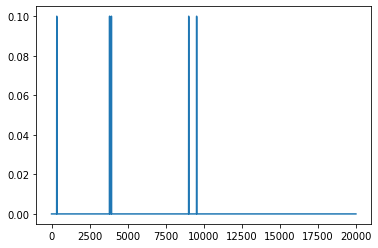

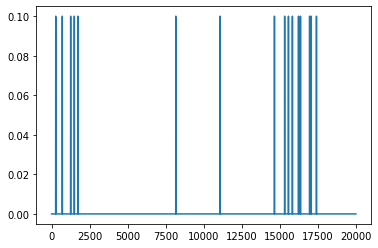

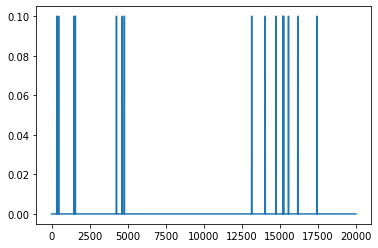

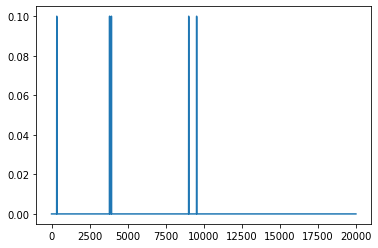

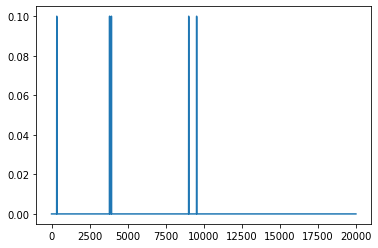

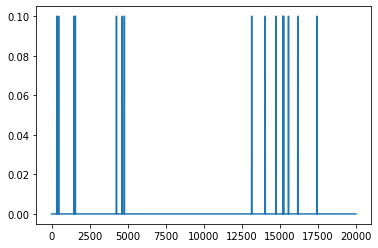

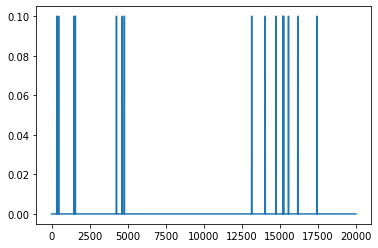

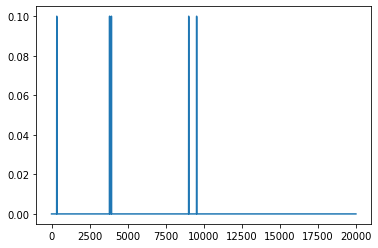

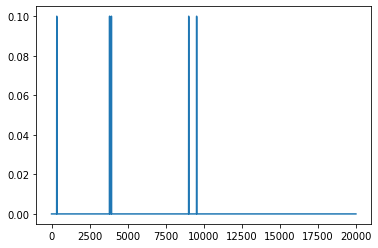

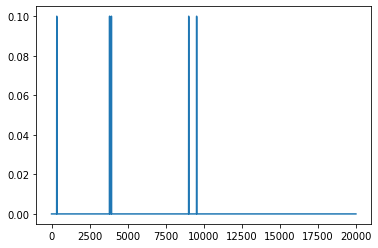

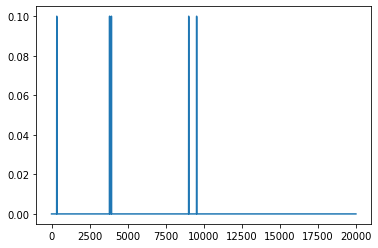

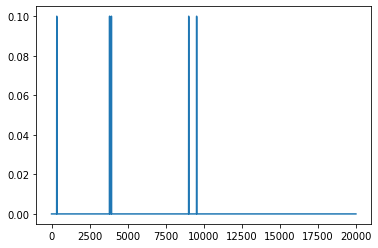

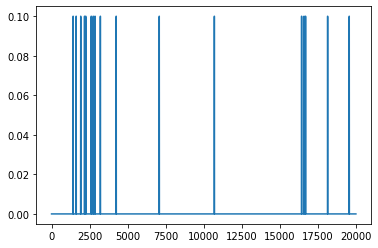

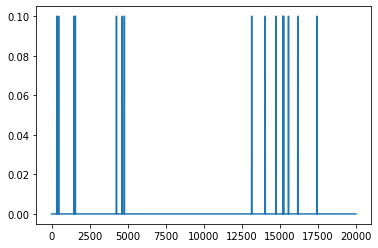

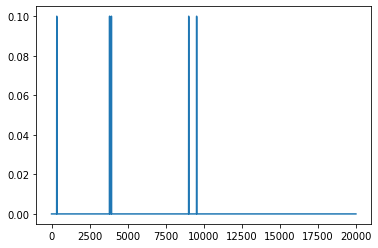

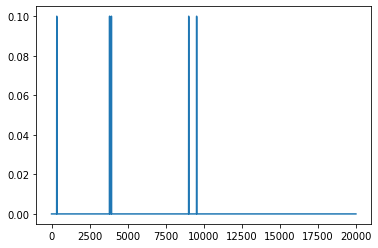

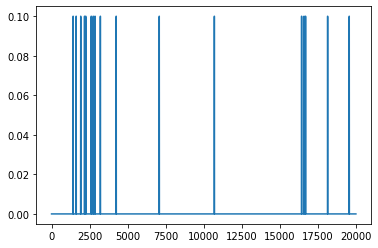

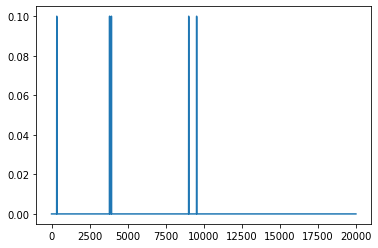

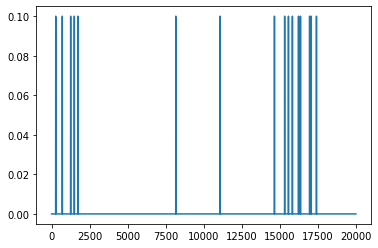

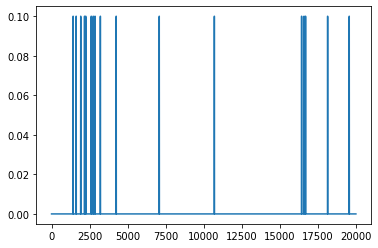

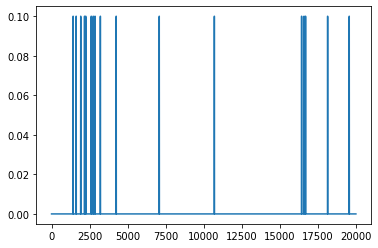

In [116]:
for u in units:
    plt.plot(plot_pairs[f"{u}"][2][-50000:-30000]/10)
    #plt.plot(plot_pairs[f"{u}"][3][-50000:-30000])
    plt.show()

In [213]:
print(nll_test.shape)
nll_test_df = pd.DataFrame({
    "NLL" : nll_test.flatten(),
    "unit" : np.array(units)
})
nll_test_df.head()

(36,)


,NLL,unit
0,0.176862,8
1,0.072049,9
2,0.016212,10
3,0.021617,12
4,0.014570,17


In [214]:
nll_test_df.iloc[np.array(nll_test_df.unit<9)]

,NLL,unit
0,0.176862,8


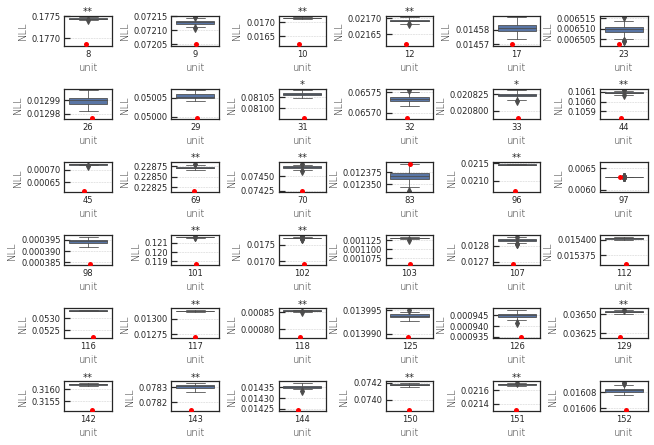

In [237]:
fig7, axs = pltr.plot_random_test_results(
    p_vals,
    nll_permut_df, 
    nll_test_df, 
    units
)

plt.subplots_adjust(
    left=0.09, right=0.99, bottom=0.06, top=0.975
)

fig7.savefig('plots/plot7.png')
fig7.savefig('plots/plot7.pdf')

In [232]:
import matplotlib
import seaborn as sns
class PLOTTER(): 
    
    def __init__(self):
        
        ### define colors ##
        self.blue2    = "#2e518c"
        self.blue3    = "#5079b3"
        self.blue4    = "#7da7d9"
        self.green1   = "#146614"
        self.green2   = "#2e8c2e"
        self.green3   = "#50b350"
        self.green4   = "#7dd97d"
        self.green5   = "#b3ffb3"
        self.red1     = "#660000"
        self.red2     = "#8c1919"
        self.red3     = "#b33e3e"
        self.red4     = "#d97272"
        self.red5     = "#ffb3b3"
        self.magenta1 = "#581466"
        self.magenta2 = "#762e8c"
        self.magenta3 = "#9650b3"
        self.magenta4 = "#b87dd9"
        self.magenta5 = "#dfb3ff"
        self.orange1  = "#b34e0b"
        self.orange2  = "#c67322"
        self.orange3  = "#d99a3d"
        self.orange4  = "#ecc05c"
        self.orange5  = "#ffe480"
        self.cyan1    = "#146666"
        self.cyan2    = "#2e8c8c"
        self.cyan3    = "#50b3b3"
        self.cyan4    = "#7dd9d9"
        self.cyan5    = "#b3ffff"
        self.gray1    = "#4d4d4d"
        self.gray2    = "#6c6c6c"
        self.gray3    = "#8c8c8c"
        self.gray4    = "#acacac"
        self.gray5    = "#cccccc"
        
        palette = "viridis"
        sns.set_palette(palette)
        
        # Plot customizations
        self.tic_font_size = "x-small"
        self.label_font_size = "small"

        self.rc = {
            "figure.figsize":(10.75, 3.75),
            "font.family":"sans serif", 
            "text.usetex":False,
            "xtick.labelsize":self.tic_font_size,
            "ytick.labelsize":self.tic_font_size,
            "axes.axisbelow":True,
            "lines.linewidth":0.8, 
            "legend.fancybox":True, 
            # "text.usetex" : True, 
            # "pdf.fonttype" : 42
        }

        matplotlib.rcParams["lines.linewidth"] = 0.8
        matplotlib.rcParams["legend.fancybox"] = True
        # matplotlib.rcParams["pdf.fonttype"] = 42
        # matplotlib.rcParams["ps.fonttype"] = 42

        # matplotlib.rcParams["text.usetex"] = True

        sns.set(rc=self.rc)
        sns.set_style('white')

        plt.tight_layout()
        
        
    def plot_random_test_results(
        self, 
        p_vals,
        nll_permut_df, 
        nll_test_df, 
        units
    ):
        
        ## set up frame for data ##
        fig, axs = plt.subplots(6,6, figsize=(9,6))

        for i in range(36):
            k = i // 6
            j = i % 6

            u = units[i]
            p_val = p_vals[i]

            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)

            ## fig prep ##
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )
            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            sns.boxplot(
                ax=axs[k,j], 
                data=nll_permut_df.iloc[np.array(nll_permut_df.unit==u)], 
                y="NLL", x="unit"
            )
            
            sns.stripplot(
                ax=axs[k,j], 
                data=nll_test_df.iloc[np.array(nll_test_df.unit==u)], 
                y="NLL", x="unit", 
                color="red"
            )

            star = ""
            if p_val < 0.05:
                star = "*"
            if p_val < 0.01:
                star = "**"
            if p_val < 0.001:
                star = "***"

            axs[k,j].set_title(star, fontsize=self.label_font_size,pad=1)

        plt.subplots_adjust(wspace=1.25, hspace=1.45)
        return fig, axs
        
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [75]:
np.array(permutation_test_results_80[0][0][2]).flatten()

array([0.02434934, 0.02427827, 0.02434906, 0.02426983, 0.02427989,
       0.02431495, 0.02434256, 0.02428942, 0.02426018, 0.02432014,
       0.02434454, 0.02430521, 0.0243225 , 0.02431013, 0.02428497,
       0.0243091 , 0.02429709, 0.02426152, 0.02434893, 0.02433993,
       0.02428743, 0.02429537, 0.02430441, 0.02432743, 0.02426565,
       0.02431869, 0.02429987, 0.02429248, 0.02430486, 0.02429151,
       0.02430718, 0.02431447, 0.02429224, 0.02431931, 0.02430392,
       0.02434555, 0.024318  , 0.02432739, 0.02435128, 0.02430865,
       0.02429754, 0.02432497, 0.02430003, 0.02431048, 0.02428477,
       0.02428876, 0.02426661, 0.0242995 , 0.02430452, 0.02433511,
       0.02426906, 0.0242575 , 0.02429745, 0.02430223, 0.02430818,
       0.02432937, 0.02429787, 0.02432157, 0.02432192, 0.02432662,
       0.0243352 , 0.02432491, 0.02430464, 0.02429486, 0.02431418,
       0.02430049, 0.02431887, 0.02428111, 0.02427797, 0.02432732,
       0.02431196, 0.0242929 , 0.02429128, 0.02428963, 0.02430

In [14]:
ptr_40.append(permutation_test_results_57)

In [24]:
ptr_40[0][0][1]

[[0.03225806451612903, 0.1913090098472767, 0.19166011872418337],
 [0.03225806451612903, 0.1913090098472767, 0.19171349869804633],
 [0.03225806451612903, 0.1913090098472767, 0.19165763931756064],
 [0.03225806451612903, 0.1913090098472767, 0.19170560002121875],
 [0.03225806451612903, 0.1913090098472767, 0.19167736841135502],
 [0.03225806451612903, 0.1913090098472767, 0.1917105264507698],
 [0.03225806451612903, 0.1913090098472767, 0.1916520257554613],
 [0.03225806451612903, 0.1913090098472767, 0.19167997092953026],
 [0.03225806451612903, 0.1913090098472767, 0.19173379258251846],
 [0.03225806451612903, 0.1913090098472767, 0.19164855677878542],
 [0.03225806451612903, 0.1913090098472767, 0.1916687363543083],
 [0.03225806451612903, 0.1913090098472767, 0.19161114526839854],
 [0.03225806451612903, 0.1913090098472767, 0.1917115361066841],
 [0.03225806451612903, 0.1913090098472767, 0.19169180796588078],
 [0.03225806451612903, 0.1913090098472767, 0.19165687169064882],
 [0.03225806451612903, 0.1913

In [99]:
units_s.sort()
units_s

[8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83]

In [102]:
test_df = exp_df.iloc[np.array(exp_df.unit<45)]
test_df_s = test_df.iloc[np.array(test_df.splits==1)]
units_s = list(set(test_df_s.unit))
test_df = test_df_s.iloc[np.array(test_df_s.unit==31)]
test_df = test_df.iloc[np.array(test_df.alpha==0.0)]
test_df = test_df.iloc[np.array(test_df.regularization==f"L{1+1}")]
print(np.array(test_df.theta.values.tolist())[0])
test_df.head(20)

[-6.72843593  0.26372974 -0.12157888 -0.20291802 -0.1007132  -0.06258857
  0.35770585  0.22755795  0.3411771  -1.37402383  0.75230404]


,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
188,0.009301,0.008982,"[-6.728435933643966, 0.263729741062471, -0.121...",13,1,31,0.0,L2


In [101]:
test_df.iloc[np.array(test_df.splits==2)]

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization


In [51]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [ ]:
def permutation_testing_per_neuron(
    self, 
    test_df,
    best_costs,
    lfp_path, 
    spike_path,
    n_permuts
):
    nll_perm = []
    ### for all splits ###
    for s in set(test_df.splits):
        X_df, y_df = None, None
        [(X_df, y_df)] = self.load_split_data(
            [s], 
            lfp_path, 
            spike_path
        )
        print(f"\n>>>>>>>>> Start Split {s}")
        test_df_s = test_df.iloc[np.array(test_df.splits==s)]
        
        units_s = list(set(test_df_s.unit))
        units_s.sort()
        
        nll_perm_s = []
        # for all neurons
        for n in range(len(units_s)): 
            u = units_s[n]
            l, alpha = best_costs[f"{u}"]
            
            print(f"\n--- Unit {u} - alpha {alpha} - L{l+1} ---")
            
            ## get data ##
            #X_val = X_df.val_dt[n]
            #y_val = y_df.val_dt[n]
            X_test = X_df.test_dt[n]
            y_test = y_df.test_dt[n]
            
            test_df_s_u = test_df_s.iloc[np.array(test_df_s.unit==u)]
            test_df_s_u = test_df_s_u.iloc[np.array(test_df_s_u.alpha==alpha)]
            test_df_s_u = test_df_s_u.iloc[np.array(test_df_s_u.regularization==f"L{l+1}")]
            
            theta_s_u = np.array(test_df_s_u.theta.values.tolist())[0]
            
            # NLL for testing data # 
            nll_test = self.validate_model(
                X_test, 
                y_test, 
                theta_s_u
            )
            
            # create permutations # 
            # reset seed to ensure that all permutations are equal over units and splits
            np.random.seed(42)   
            test_idx = np.array(range(y_test.size))
            pis = []
            for i in range(n_permuts): 
                np.random.shuffle(test_idx)
                pis.append(test_idx.copy())
                
            nll_perm_u = []
            num_nll_perm_smaller_or_eq_to_test = 0
            for pi in pis: 
                nll_pi = self.validate_model(
                    X_test, 
                    y_test[pi], 
                    theta_s_u
                )
                
                if nll_pi <= nll_test:
                    num_nll_perm_smaller_or_eq_to_test += 1
                    
                p_val_u = (num_nll_perm_smaller_or_eq_to_test+1) / (n_permuts+1)
                
                nll_perm_u.append([p_val_u, nll_test, nll_pi])
                
            
                
            nll_perm_s.append([nll_test, nll_perm_u])
            
        nll_perm.append(nll_perm_s)
        
    return nll_perm
                
            
            
            
            
            
        
        
    

In [28]:
np.random.seed(42)
dt = np.arange(0.0, 0.01, 0.0001)
dt_idx = np.array(range(dt.size))
pis = []
for i in range(3): 
    np.random.shuffle(dt_idx)
    pis.append(dt_idx.copy())
pis

[array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
        77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28,
        93,  5, 66, 65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,
         3, 17, 38,  8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68,
        61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1,
        52, 21,  2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51]),
 array([59, 65, 67,  8,  4, 55, 51, 15,  6, 77, 89, 82,  2, 46, 78, 48, 16,
        11, 76, 13, 56, 38, 29, 42, 23,  0, 12, 37, 98, 87, 36, 92, 62, 75,
        64, 91, 57, 21, 43, 69, 94, 18, 72, 31, 19, 84, 52, 17, 39, 68, 97,
        53, 86, 88, 61, 74, 47, 73,  5,  9,  7, 79, 27, 35,  1, 45,  3, 54,
        24, 34, 90, 10, 40, 33, 20, 83, 70, 32, 81, 50, 71, 95, 66, 99, 26,
        25, 60, 28, 30, 41, 58, 22, 96, 49, 44, 85, 14, 93, 80, 63]),
 array([39, 98, 25, 99, 78, 77, 72, 38, 83, 49, 19, 12,  7,  2, 56, 52, 84,
        94, 46, 79, 88, 

In [15]:
dt_perm = []
for pi in pis: 
    dt_perm.append(dt[pi])
dt_perm

[array([0.0098, 0.0004, 0.0033, 0.0061, 0.0093, 0.0084, 0.0051, 0.0094,
        0.001 , 0.0088, 0.0009, 0.0054, 0.0056, 0.0072, 0.0074, 0.0042,
        0.0044, 0.0014, 0.0081, 0.0011, 0.0077, 0.0015, 0.0013, 0.0091,
        0.    , 0.0019, 0.004 , 0.008 , 0.0035, 0.0006, 0.0071, 0.0086,
        0.0012, 0.0057, 0.0083, 0.0079, 0.0099, 0.0028, 0.0038, 0.0008,
        0.0064, 0.0055, 0.0076, 0.0025, 0.0082, 0.0067, 0.0089, 0.0001,
        0.0022, 0.0096, 0.0046, 0.0065, 0.0049, 0.007 , 0.0069, 0.0039,
        0.0066, 0.0092, 0.003 , 0.0041, 0.0024, 0.0017, 0.0002, 0.0078,
        0.0032, 0.0031, 0.0062, 0.0059, 0.0052, 0.0073, 0.0023, 0.0036,
        0.0005, 0.0045, 0.0087, 0.0043, 0.0016, 0.0048, 0.0097, 0.0034,
        0.0003, 0.0018, 0.0047, 0.006 , 0.0068, 0.0063, 0.0027, 0.0095,
        0.002 , 0.009 , 0.0026, 0.0007, 0.0053, 0.005 , 0.0037, 0.0029,
        0.0021, 0.0085, 0.0058, 0.0075]),
 array([0.0037, 0.0064, 0.0051, 0.004 , 0.0048, 0.0052, 0.0075, 0.0087,
        0.    , 0.003 